In [45]:
from metrics import calculate_metrics, read_all_tickers
import pandas as pd
from bokeh.plotting import figure, show
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import datetime
import numpy as np


In [46]:
data = read_all_tickers('data/tickers')
data.loc[:, 'Date'] = data.Date.apply(lambda x: datetime.date.fromisoformat(x))

In [47]:
subset = data.loc[data.Symbol == 'MSFT']
subset = subset.loc[subset.Date > datetime.date(2021,1,1)]
subset['Gradient'] = np.gradient(subset['Close'].rolling(center=False,window=4).mean())
subset.reset_index(inplace = True)
subset

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Gradient
0,506,2021-01-04,221.507173,221.975014,213.822655,216.689423,37130100.0,0.0,0.0,MSFT,NaN
1,507,2021-01-05,216.261380,217.515598,214.708553,216.898438,23823000.0,0.0,0.0,MSFT,NaN
2,508,2021-01-06,211.194780,215.494931,210.965841,211.274414,35930700.0,0.0,0.0,MSFT,NaN
3,509,2021-01-07,213.056186,218.331828,212.727716,217.286652,27694500.0,0.0,0.0,MSFT,NaN
4,510,2021-01-08,217.674868,219.566144,216.032458,218.610550,22956200.0,0.0,0.0,MSFT,0.189129
...,...,...,...,...,...,...,...,...,...,...,...
305,811,2022-03-21,298.890015,300.140015,294.899994,299.160004,28351200.0,0.0,0.0,MSFT,2.709999
306,812,2022-03-22,299.799988,305.000000,298.769989,304.059998,27599700.0,0.0,0.0,MSFT,1.742496
307,813,2022-03-23,300.510010,303.230011,297.720001,299.489990,25715400.0,0.0,0.0,MSFT,0.992500
308,814,2022-03-24,299.140015,304.200012,298.320007,304.100006,24484500.0,0.0,0.0,MSFT,1.023750


In [50]:
subset.iloc[peaks]

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Gradient
1,507,2021-01-05,216.261380,217.515598,214.708553,216.898438,23823000.0,0.0,0.0,MSFT,NaN
4,510,2021-01-08,217.674868,219.566144,216.032458,218.610550,22956200.0,0.0,0.0,MSFT,0.189129
7,513,2021-01-13,213.036298,215.763695,212.946700,215.345627,20087100.0,0.0,0.0,MSFT,-1.063837
17,523,2021-01-28,234.527055,241.524741,234.009441,237.831787,49111200.0,0.0,0.0,MSFT,1.917398
19,525,2021-02-01,233.979578,241.385384,231.361662,238.548477,33314200.0,0.0,0.0,MSFT,1.733244
...,...,...,...,...,...,...,...,...,...,...,...
292,798,2022-03-02,295.359985,301.470001,293.700012,300.190002,31873000.0,0.0,0.0,MSFT,0.526253
297,803,2022-03-09,283.440002,289.600006,280.779999,288.500000,35204500.0,0.0,0.0,MSFT,-1.461250
304,810,2022-03-18,295.369995,301.000000,292.730011,300.429993,43317000.0,0.0,0.0,MSFT,4.500000
306,812,2022-03-22,299.799988,305.000000,298.769989,304.059998,27599700.0,0.0,0.0,MSFT,1.742496


In [48]:
peaks, peak_properties = find_peaks(subset.Close, plateau_size = 1)
bottoms, bottom_properties =  find_peaks(subset.Close * - 1, plateau_size=1)

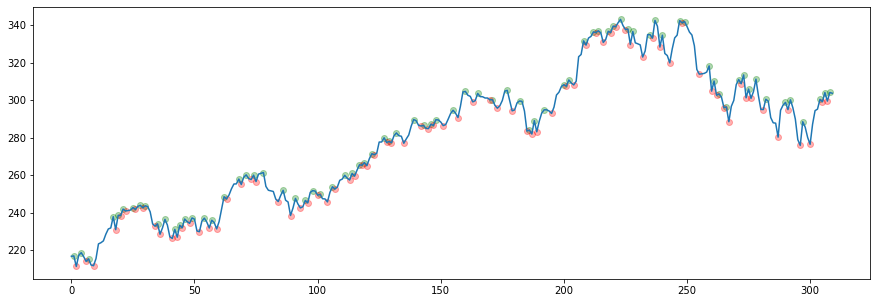

In [13]:
plt.figure(figsize=(15,5))
plt.plot(subset.index, subset.Close)
plt.scatter(x = peaks, y = subset.Close.iloc[peaks], alpha = .3, color = 'g')
plt.scatter(x = bottoms, y = subset.Close.iloc[bottoms], alpha = .3, color = 'r')



In [14]:
peaks

array([  1,   4,   7,  17,  19,  21,  25,  28,  30,  35,  38,  42,  44,
        46,  49,  54,  57,  62,  68,  71,  74,  78,  86,  91,  95,  98,
       101, 106, 111, 114, 117, 119, 122, 127, 129, 132, 139, 143, 146,
       148, 155, 160, 165, 171, 177, 182, 186, 188, 192, 200, 202, 208,
       212, 214, 218, 220, 223, 226, 228, 235, 237, 240, 247, 249, 259,
       261, 263, 266, 271, 273, 275, 278, 282, 290, 292, 297, 304, 306,
       308])

In [15]:
peak_properties

{'plateau_sizes': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'left_edges': array([  1,   4,   7,  17,  19,  21,  25,  28,  30,  35,  38,  42,  44,
         46,  49,  54,  57,  62,  68,  71,  74,  78,  86,  91,  95,  98,
        101, 106, 111, 114, 117, 119, 122, 127, 129, 132, 139, 143, 146,
        148, 155, 160, 165, 171, 177, 182, 186, 188, 192, 200, 202, 208,
        212, 214, 218, 220, 223, 226, 228, 235, 237, 240, 247, 249, 259,
        261, 263, 266, 271, 273, 275, 278, 282, 290, 292, 297, 304, 306,
        308]),
 'right_edges': array([  1,   4,   7,  17,  19,  21,  25,  28,  30,  35,  38,  42,  44,
         46,  49,  54,  57,  62,  68,  71,  74,  78,  86,  91,  95,  98,
        101, 106, 111, 114, 117, 119, 122, 127, 129, 132, 139, 143, 146,
        148

In [16]:
bottom_properties


{'plateau_sizes': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'left_edges': array([  2,   6,   9,  18,  20,  22,  26,  29,  34,  36,  41,  43,  45,
         48,  52,  56,  59,  63,  69,  73,  75,  84,  89,  93,  96, 100,
        104, 107, 113, 115, 118, 120, 123, 128, 130, 135, 142, 145, 147,
        151, 157, 163, 170, 173, 179, 185, 187, 189, 195, 201, 204, 209,
        213, 216, 219, 221, 225, 227, 232, 236, 239, 243, 248, 255, 260,
        262, 265, 267, 272, 274, 276, 281, 287, 291, 296, 300, 305, 307]),
 'right_edges': array([  2,   6,   9,  18,  20,  22,  26,  29,  34,  36,  41,  43,  45,
         48,  52,  56,  59,  63,  69,  73,  75,  84,  89,  93,  96, 100,
        104, 107, 113, 115, 118, 120, 123, 128, 130, 135, 142, 145, 147,
        151, 157, 163, 170,

In [17]:
f = [*peaks, *bottoms]

In [18]:
f_price = subset.iloc[sorted(f)].Close
f_price

1      216.898438
2      211.274414
4      218.610550
6      213.942093
7      215.345627
          ...    
304    300.429993
305    299.160004
306    304.059998
307    299.489990
308    304.100006
Name: Close, Length: 157, dtype: float64

In [19]:
window_size = 5
db_count = 0
double_bottoms = []
for i in range(len(f_price) - window_size + 1):
    x = f_price[i:i+window_size]
    
    xl = x.to_list()
    
    if xl[0] > xl[1] and xl[1] < xl[2] and xl[2] > xl[3] and xl[1] < xl[3] and xl[3] < xl[4] and xl[2] < xl[4]:
        if xl[0] * .99 > xl[1]: # exclude minor movements
            if subset['Gradient'].iloc[x.index[1]:x.index[2]].is_monotonic and subset['Gradient'].iloc[x.index[2]:x.index[3]].is_monotonic:
                double_bottoms.append(x)
                db_count += 1
print(db_count)


11


In [20]:
x = f_price[1:6]
x

2    211.274414
4    218.610550
6    213.942093
7    215.345627
9    211.672577
Name: Close, dtype: float64

In [21]:
x.index[0]

2

In [22]:
mod_db = [ db*.97 for db in double_bottoms] 

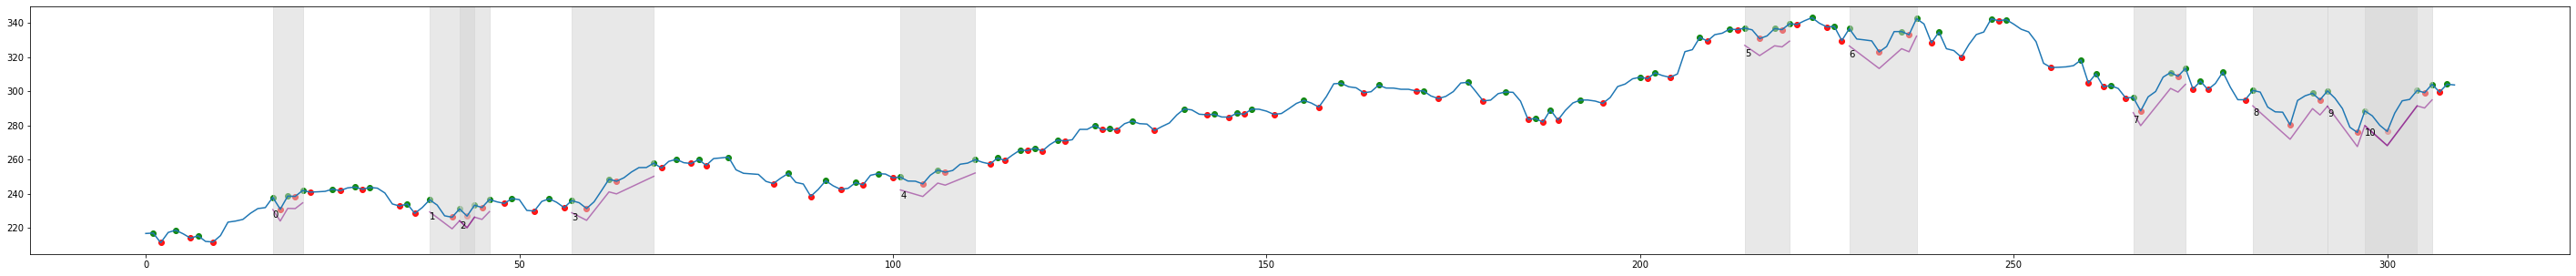

In [23]:
plt.figure(figsize=(50,5))
plt.plot(subset.index, subset.Close)
plt.scatter(x = peaks, y = subset.Close.iloc[peaks], alpha = .9, color = 'g')
plt.scatter(x = bottoms, y = subset.Close.iloc[bottoms], alpha = .9, color = 'r')
i = 0
for db in mod_db:
    plt.plot(db.index, db.values, color = 'purple',linestyle = '-', alpha = .5)
    plt.axvspan(db.index[0], db.index[-1], color = 'lightgray', alpha = .5) 
    plt.text(x = db.index[0], y = db.values[0] * .98, s = str(i))
    i+=1

In [68]:
def find_w_pattern(subset, column_of_interest = "Close"):
    subset['Gradient'] = np.gradient(subset[column_of_interest].rolling(center=False,window=4).mean())
    subset.reset_index(inplace = True, drop= True)
    peaks, peak_properties = find_peaks(subset[column_of_interest], plateau_size = 1)
    bottoms, bottom_properties =  find_peaks(subset[column_of_interest] * - 1, plateau_size=1)
    local_extrema = [*peaks, *bottoms] # merging the two lists
    f_price = subset.iloc[sorted(local_extrema)][column_of_interest]

    window_size = 5
    db_count = 0
    double_bottoms = []
    for i in range(len(f_price) - window_size + 1):
        x = f_price[i:i+window_size]
        
        xl = x.to_list()
        
        if xl[0] > xl[1] and xl[1] < xl[2] and xl[2] > xl[3] and xl[1] < xl[3] and xl[3] < xl[4] and xl[2] < xl[4]:
            if xl[0] * .99 > xl[1]: # exclude minor movements
                if subset['Gradient'].iloc[x.index[1]:x.index[2]].is_monotonic and subset['Gradient'].iloc[x.index[2]:x.index[3]].is_monotonic:
                    double_bottoms.append(x)
                    db_count += 1
    
    mod_db = [ db*.97 for db in double_bottoms] 
    # plt.figure(figsize=(50,5))
    # plt.plot(subset.index, subset[column_of_interest])
    # plt.xticks(subset.Date)
    # plt.scatter(x = peaks, y = subset[column_of_interest].iloc[peaks], alpha = .9, color = 'g')
    # plt.scatter(x = bottoms, y = subset[column_of_interest].iloc[bottoms], alpha = .9, color = 'r')
    # i = 0
    # for db in mod_db:
    #     plt.plot(db.index, db.values, color = 'purple',linestyle = '-', alpha = .5)
    #     plt.axvspan(db.index[0], db.index[-1], color = 'lightgray', alpha = .5) 
    #     plt.text(x = db.index[0], y = db.values[0] * .98, s = str(i))
    #     i+=1
        
    p = figure(title = 'W patterns',
        x_axis_label = 'Date',
        y_axis_label = 'W%R',
        x_axis_type ='datetime',
        plot_width = 800,
        plot_height = 200,
        tools = 'wheel_zoom, pan, reset')
    
    
    p.line(x = subset.Date, y = subset[column_of_interest], line_width = 2)
    p.circle(x = subset.Date.iloc[peaks], y = subset[column_of_interest].iloc[peaks], size = 50, alpha = .9, color = 'g')
    p.circle(x = subset.Date.iloc[bottoms], y = subset[column_of_interest].iloc[bottoms], size = 50, alpha = .9, color = 'r')
    show(p)

In [69]:
subset = data.loc[data.Symbol == 'MSFT']
find_w_pattern(subset) 

/var/folders/c6/5pqpts4j0z714gbd4lgp_1g80000gn/T/ipykernel_10109/1005229260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Gradient'] = np.gradient(subset[column_of_interest].rolling(center=False,window=4).mean())
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "g", key "hatch_color" value "g", key "line_color" value "g" [renderer: GlyphRenderer(id='4960', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fi